In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index= pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis = 1,inplace = True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

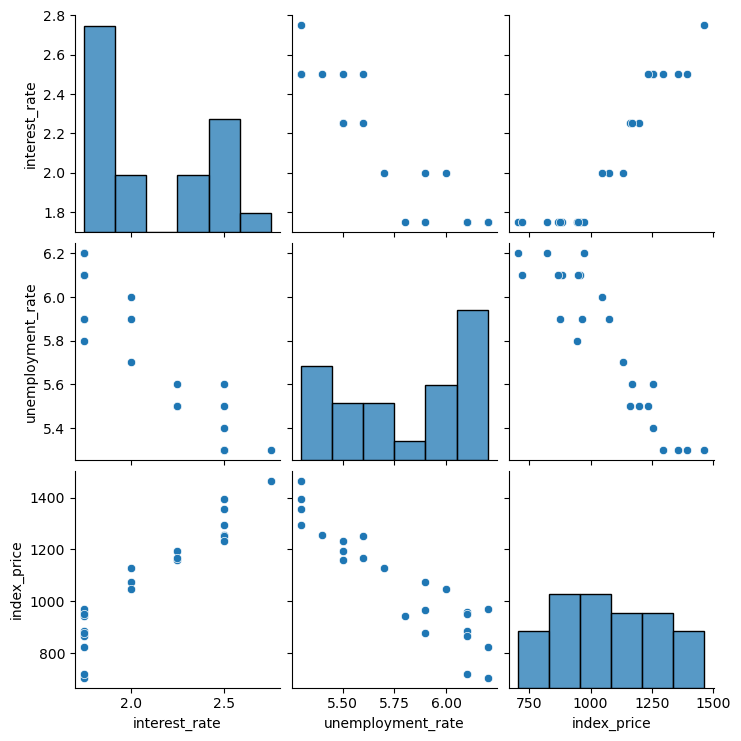

In [12]:
## visualization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


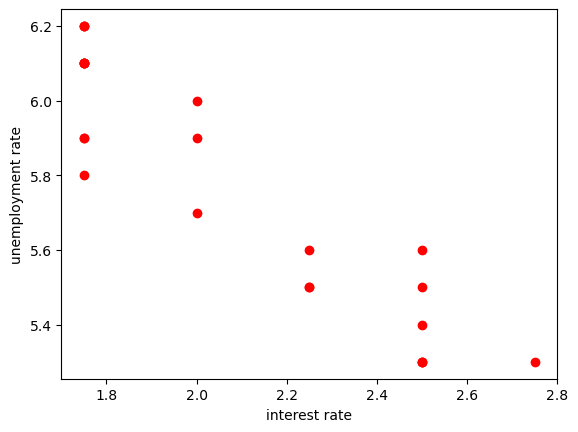

In [16]:
## visualization of the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployment rate")
plt.show()

In [18]:
##independent and dependent features
x = df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [19]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

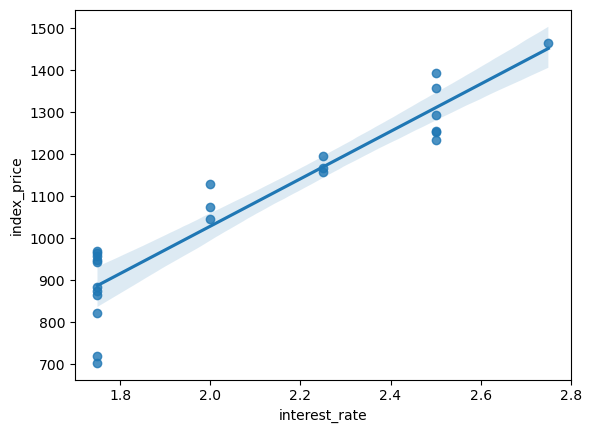

In [22]:
sns.regplot(
    x=df_index['interest_rate'],
    y=df_index['index_price']
)
plt.show()


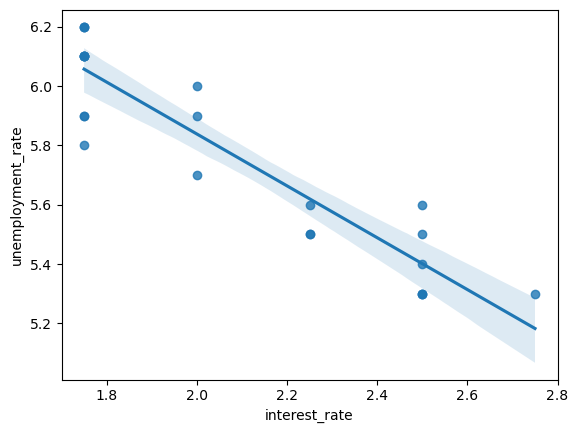

In [23]:
sns.regplot(
    x=df_index['interest_rate'],
    y=df_index['unemployment_rate']
)
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(x_train,y_train)

LinearRegression()

In [28]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error',cv=3
                                  )

In [29]:
## prediction
y_pred =  regression.predict(x_test)

In [30]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [31]:
## performancce metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
#display adjusted r-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.7591371539010254
0.5985619231683756


## assumptions


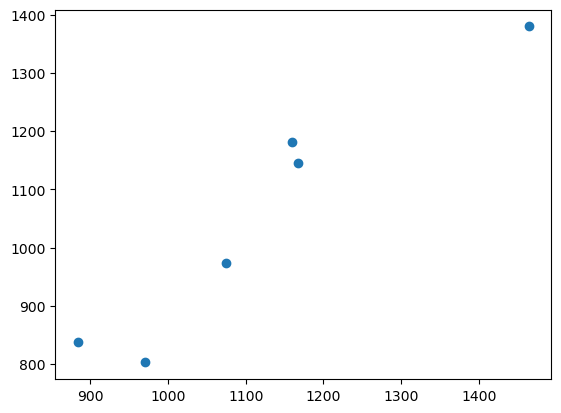

In [33]:
plt.scatter(y_test,y_pred)
plt.show()

In [34]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


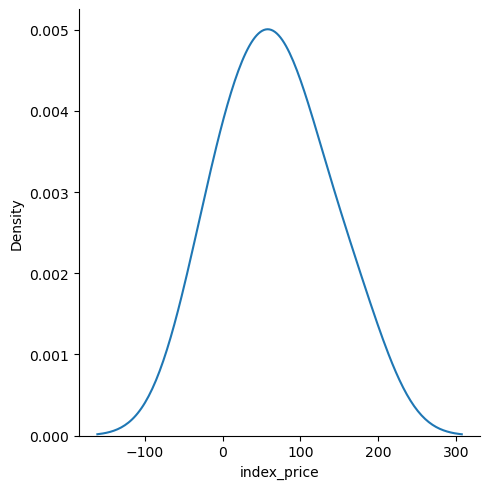

In [37]:
## plt the residuals
sns.displot(residuals,kind = 'kde')
plt.show()

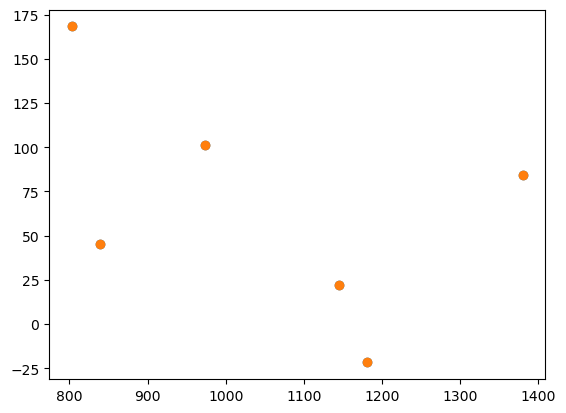

In [39]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
plt.show()

In [41]:
## old linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [42]:
model.summary()

D:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 14 Jan 2026   Prob (F-statistic):                       0.754
Time:                        20:46:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(regression.coef_)

[  88.27275507 -116.25716066]
